In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
df=pd.read_csv('/content/pet_food_customer_orders.csv')

# 애완 동물 사료를 구매하는 사람들의 특징을 찾아보자.
# 이 데이터를 바탕으로 더 많은 고객이 애완동물 식품을 계속 구매할 수 있도록 하기위해 무엇에 중점을 두어야할까?
# 또한 주요 특성은? 

In [ ]:
#데이터 탐색
df.shape
df.describe()
df.info()
# print(df.pet_allergen_list.value_counts())#알러지의 경우 너무 다양하기에 가장 많은 알러지만 신경쓰거나 아예 신경쓰지 않기, 결측치도 높음
# print(df.pet_fav_flavour_list.value_counts()) #선호도
df.pet_health_issue_list.value_counts() # 반려동물 앓고있는 병 그나마 있는견과 없는견을 나눌만한가?
df.neutered.value_counts() #반반 정도?
df.gender.value_counts() #암수여도 중성화한거 따로 신경안씀
df.customer_support_ticket_category.value_counts() #쿠폰 같은걸 이야기하나?
df.signup_promo.value_counts() #가입한 경로

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49042 entries, 0 to 49041
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                49042 non-null  uint64 
 1   pet_id                                     49042 non-null  uint64 
 2   pet_order_number                           49042 non-null  int64  
 3   wet_food_order_number                      12788 non-null  float64
 4   orders_since_first_wet_trays_order         14372 non-null  float64
 5   pet_has_active_subscription                49042 non-null  bool   
 6   pet_food_tier                              49042 non-null  object 
 7   pet_signup_datetime                        49042 non-null  object 
 8   pet_allergen_list                          10758 non-null  object 
 9   pet_fav_flavour_list                       21022 non-null  object 
 10  pet_health_issue_list 

Null & Default      12059
Search Generic       8535
Digital Display      6364
Refer a Friend       5297
Incompletes          5248
Search Brand         4247
Events               2634
Affiliates           1906
Social Marketing      840
Inserts               832
Other                 762
Shopping Centres      184
Vet                   134
Name: signup_promo, dtype: int64

In [ ]:
#데이터 전처리
df['wet_food_order_number']=df['wet_food_order_number'].fillna(0) #주문 갯수가 없다면 0이라고 측정
df['orders_since_first_wet_trays_order']=df['orders_since_first_wet_trays_order'].fillna(0)
df['pet_signup_datetime']=pd.to_datetime(df.pet_signup_datetime) #펫들이 등록된날? 근데 뭐이리 옛날자료가잇지
df['order_payment_date']=pd.to_datetime(df.order_payment_date) #가격 지불한날
df['last_customer_support_ticket_date']=pd.to_datetime(df.last_customer_support_ticket_date) #티켓을 사용한 마지막날
df.wet_tray_size.unique()
df['wet_tray_size']=df['wet_tray_size'].replace(['150g','None','300g','Both'],[150,0,300,450])
df=df.fillna(0)
df['dry_food_order_number']=np.array(df.pet_order_number)-np.array(df.wet_food_order_number) #건식 추가
df=df[['customer_id', 'pet_order_number',
       'dry_food_order_number', 'wet_food_order_number',
       'orders_since_first_wet_trays_order', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_signup_datetime', 'pet_allergen_list',
       'pet_fav_flavour_list', 'pet_health_issue_list', 'neutered', 'gender',
       'pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
       'dry_food_brand_pre_tails', 'pet_life_stage_at_order',
       'order_payment_date', 'kibble_kcal', 'wet_kcal', 'total_order_kcal',
       'wet_trays', 'wet_food_discount_percent', 'wet_tray_size',
       'premium_treat_packs', 'total_web_sessions',
       'total_web_sessions_since_last_order', 'total_minutes_on_website',
       'total_minutes_on_website_since_last_order', 'total_wet_food_updates',
       'total_wet_food_updates_since_last_order',
       'last_customer_support_ticket_date', 'customer_support_ticket_category']] 

df


,customer_id,pet_order_number,dry_food_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,neutered,gender,pet_breed_size,signup_promo,ate_wet_food_pre_tails,dry_food_brand_pre_tails,pet_life_stage_at_order,order_payment_date,kibble_kcal,wet_kcal,total_order_kcal,wet_trays,wet_food_discount_percent,wet_tray_size,premium_treat_packs,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category
0,10574848487411271014,2,1.0,1.0,1.0,True,superpremium,1970-01-01 00:00:01.552397819,0,Chicken,"digestion, joints",True,female,large,Null & Default,True,Canagan,mature,2019-04-11,36876.7240,1234.65,38111.3740,11,0.0,150,0,6,4,101,32,0,0,2019-03-16 09:10:12+00:00,proactive
1,10574848487411271014,1,1.0,0.0,0.0,True,superpremium,1970-01-01 00:00:01.552397819,0,Chicken,"digestion, joints",True,female,large,Null & Default,True,Canagan,mature,2019-03-18,21419.3050,0.00,21419.3050,0,0.0,0,0,2,1,69,3,0,0,2019-03-16 09:10:12+00:00,proactive
2,10574848487411271014,8,1.0,7.0,7.0,True,superpremium,1970-01-01 00:00:01.552397819,0,Chicken,"digestion, joints",True,female,large,Null & Default,True,Canagan,mature,2019-10-27,18352.8360,6624.00,24976.8360,60,0.0,150,0,18,0,184,0,0,0,2019-10-26 06:10:13+00:00,account
3,10574848487411271014,4,1.0,3.0,3.0,True,superpremium,1970-01-01 00:00:01.552397819,0,Chicken,"digestion, joints",True,female,large,Null & Default,True,Canagan,mature,2019-05-20,36617.2140,2901.90,39519.1140,26,0.0,150,0,13,6,130,15,0,0,2019-04-23 06:28:12+00:00,account
4,10574848487411271014,9,1.0,8.0,8.0,True,superpremium,1970-01-01 00:00:01.552397819,0,Chicken,"digestion, joints",True,female,large,Null & Default,True,Canagan,mature,2019-11-20,18340.3000,6624.00,24964.3000,60,0.0,150,0,19,1,184,0,0,0,2019-10-26 06:10:13+00:00,account
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49037,1602644382369102712,1,1.0,0.0,0.0,True,superpremium,1970-01-01 00:00:01.583596175,beef dairy egg soya wheat,0,skin and coat,False,female,medium,Null & Default,False,0,mature,2020-03-22,8842.6700,0.00,8842.6700,0,0.0,0,0,2,2,3,3,0,0,2019-08-08 14:36:23+00:00,account
49038,14508867151972863489,1,1.0,0.0,0.0,False,superpremium,1970-01-01 00:00:01.579811631,0,0,joints,True,female,small,Search Brand,False,Royal Canin,mature,2020-01-23,13508.9650,0.00,13508.9650,0,0.0,0,0,1,0,24,0,0,0,0,0
49039,2727061752335930686,1,1.0,0.0,0.0,False,premium,1970-01-01 00:00:01.574160444,0,Beef Lamb,joints,True,male,small,Inserts,False,Barking Heads,mature,2019-11-19,20192.1300,0.00,20192.1300,0,0.0,0,0,2,0,44,0,0,0,2019-11-19 10:41:09+00:00,sign_up
49040,13468469054368461493,1,0.0,1.0,1.0,False,mid,1970-01-01 00:00:01.571563316,0,0,0,False,female,toy,Null & Default,False,Bakers,mature,2019-10-20,2555.9260,1029.60,3585.5260,9,0.5,150,0,0,0,0,0,0,0,0,0


In [ ]:
#3번 이상 시킨사람들이 주된고객이니 그들의 특성을 파악해보자
# df[(df['pet_has_active_subscription']==True) & ]
group=df.groupby('customer_id')
custom=group.size()[group.size()>2] #여태까지 주문한 횟수가 3번이 안넘는사람들은 제외한다.
custom.index

good_customer=df[df.customer_id.isin(custom.index)] #4번 이상 주문한 사람들의 데이터
bad_customer=df[~df.customer_id.isin(custom.index)] #3번 이하로 주문한 사람들의 데이터
subscriber=df[df.pet_has_active_subscription==True]
non_subscriber=df[~df.pet_has_active_subscription==True]
good_customer #3번이상 주문한 사람들의 데이터
group.size()

subscriber.signup_promo.value_counts()


Null & Default      8125
Search Generic      5767
Digital Display     4149
Refer a Friend      3632
Incompletes         3562
Search Brand        2824
Events              1890
Affiliates          1152
Inserts              573
Social Marketing     535
Other                513
Shopping Centres     132
Vet                   41
Name: signup_promo, dtype: int64

In [ ]:
#인당 주문한 수를 살펴보자 
#인당 데이터 생성
grouped=good_customer.set_index(['customer_id']).groupby(level=0)
grouped2=bad_customer.set_index(['customer_id']).groupby(level=0)

# print(grouped.sum())
# print(grouped2.sum())
print('=============================================')
print(df.pet_food_tier.value_counts())
print(good_customer.pet_food_tier.value_counts())
print(bad_customer.pet_food_tier.value_counts())
print('=============================================')
# print(df.pet_has_active_subscription.value_counts())
# print(grouped.pet_order_number.sum())
# print(grouped2.pet_order_number.sum())
# print((grouped.pet_has_active_subscription.sum()>0))

good_customer_data=pd.concat([
    grouped.pet_order_number.sum(),
    grouped.dry_food_order_number.sum(),
    grouped.wet_food_order_number.sum(),
    grouped.pet_has_active_subscription.sum()>0
    ],axis=1)
bad_customer_data=pd.concat([
    grouped2.pet_order_number.sum(),
    grouped2.dry_food_order_number.sum()
    ,grouped2.wet_food_order_number.sum()
    ,grouped2.pet_has_active_subscription.sum()>0
    ],axis=1)
good_customer_data
all_customer_data=pd.concat([good_customer_data,bad_customer_data],axis=0)
subscriber_data=all_customer_data[all_customer_data.pet_has_active_subscription==True]
non_subscriber_data=all_customer_data[all_customer_data.pet_has_active_subscription==False]
subscriber_data['wet_percent']=subscriber_data['wet_food_order_number']/subscriber_data['pet_order_number']
non_subscriber_data['wet_percent']=non_subscriber_data['wet_food_order_number']/non_subscriber_data['pet_order_number']
num1=list(range(1,7063))
num2=list(range(1,4107))
subscriber_data['new_id']=num1
non_subscriber_data['new_id']=num2
non_subscriber_data
good_customer_data

superpremium    28531
mid             11518
premium          8993
Name: pet_food_tier, dtype: int64
superpremium    24163
mid              9836
premium          8122
Name: pet_food_tier, dtype: int64
superpremium    4368
mid             1682
premium          871
Name: pet_food_tier, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,pet_order_number,dry_food_order_number,wet_food_order_number,pet_has_active_subscription
customer_id,,,,
4392737593978297,10,0.0,10.0,False
6471371950328271,184,87.0,97.0,True
7609166505023282,55,55.0,0.0,False
10400009889703944,36,0.0,36.0,False
11827823313158012,13,13.0,0.0,False
...,...,...,...,...
18434601245588375298,4,0.0,4.0,False
18438665393590561708,17,9.0,8.0,True
18441098910908230444,15,15.0,0.0,True


In [ ]:
gg=good_customer.groupby(by='customer_id').mean()
gg 
bb=bad_customer.groupby(by='customer_id').mean()
bb

,pet_order_number,dry_food_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,neutered,ate_wet_food_pre_tails,kibble_kcal,wet_kcal,total_order_kcal,wet_trays,wet_food_discount_percent,wet_tray_size,premium_treat_packs,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order
customer_id,,,,,,,,,,,,,,,,,,,,
1969421412923625,1.5,0.0,1.5,1.5,1.0,1.0,1.0,25424.3085,2985.000,28409.3085,12.5,0.250000,300.0,0.0,3.5,1.5,1154.5,601.5,0.0,0.0
2441192939363434,1.5,0.0,1.5,1.5,1.0,1.0,1.0,7483.4010,1413.750,9067.1010,12.5,0.250000,150.0,0.0,2.5,1.0,15.0,0.0,0.0,0.0
5748999654342296,1.5,0.0,1.5,1.5,1.0,1.0,1.0,10817.9425,4744.800,15562.7425,21.0,0.250017,300.0,0.0,3.0,2.0,45.0,35.0,0.0,0.0
6434555296330718,1.0,1.0,0.0,0.0,0.0,1.0,0.0,13357.7870,0.000,13357.7870,0.0,0.000000,0.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0
13995765811030578,1.0,0.5,0.5,0.5,0.0,1.0,1.0,6837.3460,520.425,7697.6710,4.5,0.250000,75.0,0.0,1.0,0.0,43.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18436248243500688429,1.0,0.0,1.0,1.0,1.0,0.0,1.0,6926.1990,2115.450,9041.6490,18.0,0.500000,150.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
18439149718866011649,1.0,1.0,0.0,0.0,0.0,0.0,1.0,13050.7710,0.000,13064.0460,0.0,0.000000,0.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0
18439620001460909076,2.0,2.0,0.0,0.0,1.0,1.0,0.0,16321.3800,0.000,16321.3800,0.0,0.000000,0.0,0.0,1.0,1.0,79.0,79.0,0.0,0.0


In [ ]:
print('=============================================')
print(df.wet_tray_size.value_counts())
print(good_customer.wet_tray_size.value_counts())
print(bad_customer.wet_tray_size.value_counts())
print('=============================================')
print(df.signup_promo.value_counts())
print(good_customer.signup_promo.value_counts())
print(bad_customer.signup_promo.value_counts())
print(subscriber.signup_promo.value_counts())
print(non_subscriber.signup_promo.value_counts())


#친구 추천이 생각보다 높은것을 생각해보면 가입할때 친구 추천란에 아이디를 받는것도 홍보에 도움이 될것 같다. 집단에따른 광고효과는 없는것 같음


0      36254
150     7635
300     5152
450        1
Name: wet_tray_size, dtype: int64
0      31366
150     6349
300     4405
450        1
Name: wet_tray_size, dtype: int64
0      4888
150    1286
300     747
Name: wet_tray_size, dtype: int64
Null & Default      12059
Search Generic       8535
Digital Display      6364
Refer a Friend       5297
Incompletes          5248
Search Brand         4247
Events               2634
Affiliates           1906
Social Marketing      840
Inserts               832
Other                 762
Shopping Centres      184
Vet                   134
Name: signup_promo, dtype: int64
Null & Default      10399
Search Generic       7380
Digital Display      5282
Incompletes          4645
Refer a Friend       4566
Search Brand         3560
Events               2428
Affiliates           1525
Social Marketing      738
Inserts               697
Other                 696
Vet                   128
Shopping Centres       77
Name: signup_promo, dtype: int64
Null & Default  

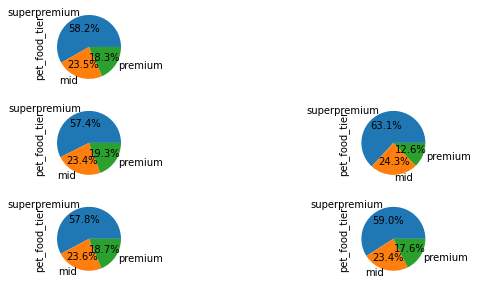

In [ ]:
# 자주사는 고객들이 안사는 고객들보다 premium 상품에대한 구매 비율이 높다는 것을 알수있음

plt.figure(figsize=(10,5))
plt.subplot(3,2,1)
df.pet_food_tier.value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,2,3)
good_customer.pet_food_tier.value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(3,2,4)
bad_customer.pet_food_tier.value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(3,2,5)
subscriber.pet_food_tier.value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(3,2,6)
non_subscriber.pet_food_tier.value_counts().plot.pie(autopct="%1.1f%%")



plt.show()

  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

['large' 'medium' 'small' 'toy' 'giant']


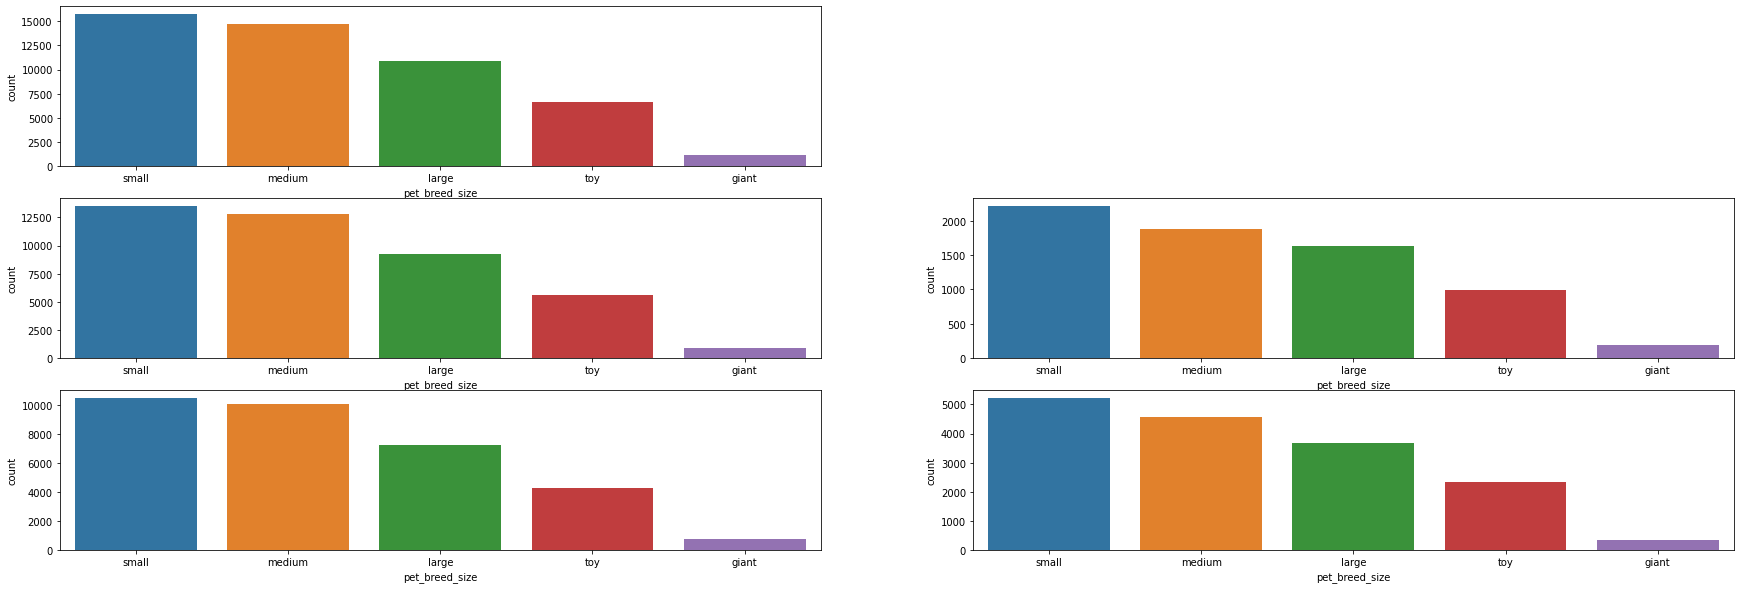

In [ ]:
# 강아지의 크기는 구매력에 큰 상관은 없어보임
plt.figure(figsize=(30,10))
plt.subplot(3,2,1)
sns.countplot(df.pet_breed_size,order=df.pet_breed_size.value_counts().index)
plt.subplot(3,2,3)
sns.countplot(good_customer.pet_breed_size,order=df.pet_breed_size.value_counts().index)

plt.subplot(3,2,4)
sns.countplot(bad_customer.pet_breed_size,order=df.pet_breed_size.value_counts().index)

plt.subplot(3,2,5)
sns.countplot(subscriber.pet_breed_size,order=df.pet_breed_size.value_counts().index)
plt.subplot(3,2,6)
sns.countplot(non_subscriber.pet_breed_size,order=df.pet_breed_size.value_counts().index)


print(df.pet_breed_size.unique())
plt.show()

  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

['mature' 'half_maturity' 'weaning' 'senior']


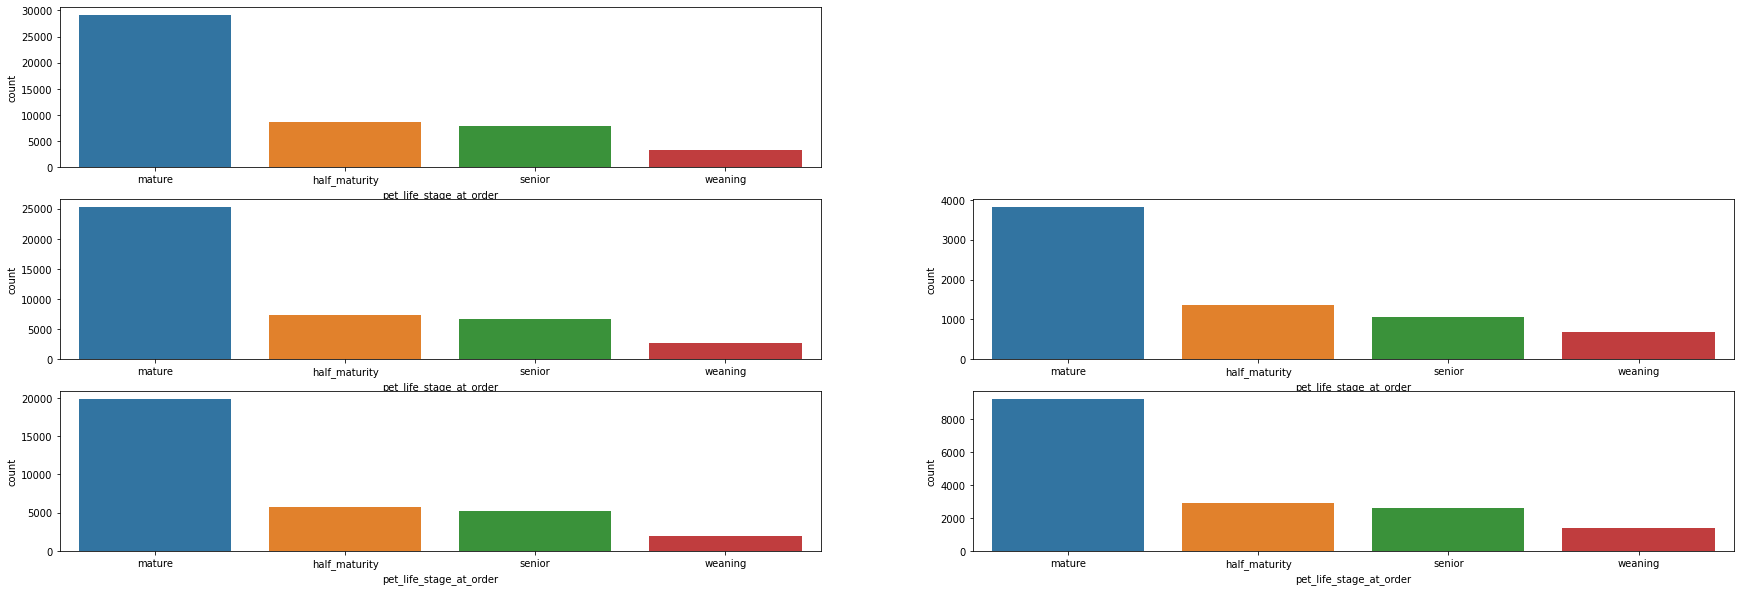

In [ ]:

# 강아지의 성장도 큰 상관은 없어보임
plt.figure(figsize=(30,10))
plt.subplot(3,2,1)
sns.countplot(df.pet_life_stage_at_order ,order=df.pet_life_stage_at_order.value_counts().index)
plt.subplot(3,2,3)
sns.countplot(good_customer.pet_life_stage_at_order,order=df.pet_life_stage_at_order.value_counts().index)
plt.subplot(3,2,4)
sns.countplot(bad_customer.pet_life_stage_at_order,order=df.pet_life_stage_at_order.value_counts().index)

plt.subplot(3,2,5)
sns.countplot(subscriber.pet_life_stage_at_order,order=df.pet_life_stage_at_order.value_counts().index)
plt.subplot(3,2,6)
sns.countplot(non_subscriber.pet_life_stage_at_order,order=df.pet_life_stage_at_order.value_counts().index)


print(df.pet_life_stage_at_order.unique())
plt.show()

  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

['Chicken' 0 'Chicken Lamb' 'Chicken Fish' 'Chicken Fish Lamb'
 'Beef Chicken' 'Beef Fish' 'Lamb' 'Beef Fish Lamb' 'Fish' 'Fish Lamb'
 'Beef' 'Beef Chicken Lamb' 'Beef Lamb' 'Beef Chicken Fish Lamb'
 'Beef Chicken Fish' 'Beef Chicken Duck Fish Lamb']


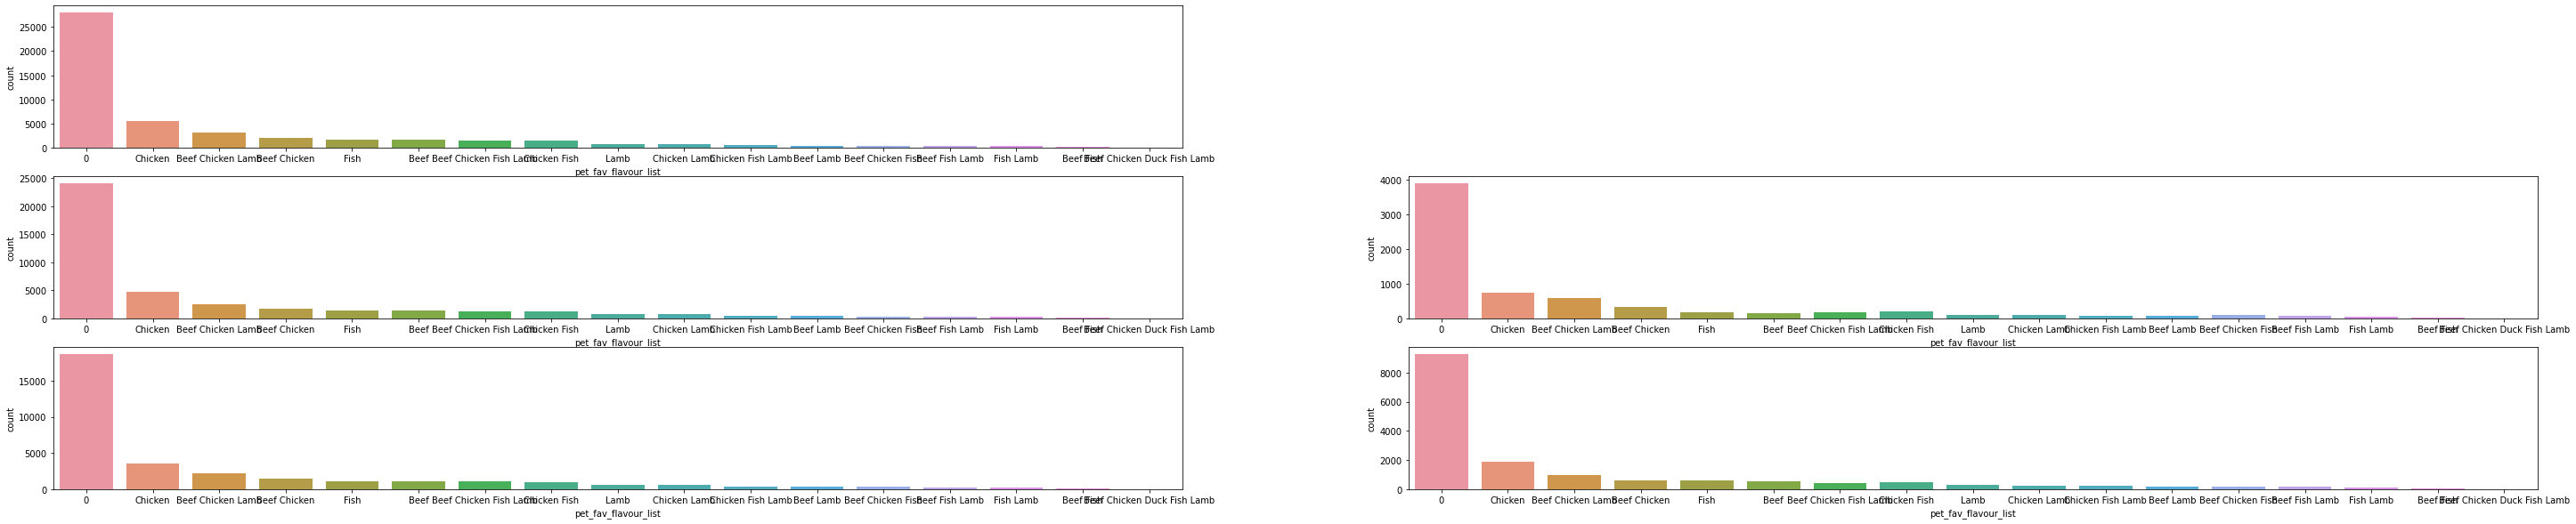

In [ ]:
# 치킨의 선호율이 높은것을 알수있음 또한 높은 구매력을 가진사람들이 다른 집단에비해 치킨을 더욱더 선호함 

plt.figure(figsize=(50,10))
plt.subplot(3,2,1)
sns.countplot(df.pet_fav_flavour_list,order=df.pet_fav_flavour_list.value_counts().index)
plt.subplot(3,2,3)
sns.countplot(good_customer.pet_fav_flavour_list,order=df.pet_fav_flavour_list.value_counts().index)

plt.subplot(3,2,4)
sns.countplot(bad_customer.pet_fav_flavour_list,order=df.pet_fav_flavour_list.value_counts().index)

plt.subplot(3,2,5)
sns.countplot(subscriber.pet_fav_flavour_list,order=df.pet_fav_flavour_list.value_counts().index)
plt.subplot(3,2,6)
sns.countplot(non_subscriber.pet_fav_flavour_list,order=df.pet_fav_flavour_list.value_counts().index)


print(df.pet_fav_flavour_list.unique())
plt.show()

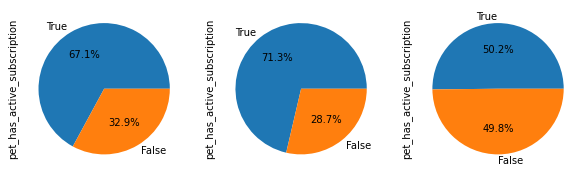

In [ ]:

#많은 구매를 한사람들이 구독을 했을 확률이 높다.
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
df.pet_has_active_subscription.value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,3,2)
good_customer_data.pet_has_active_subscription.value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(1,3,3)
bad_customer_data.pet_has_active_subscription.value_counts().plot.pie(autopct="%1.1f%%")

plt.show()


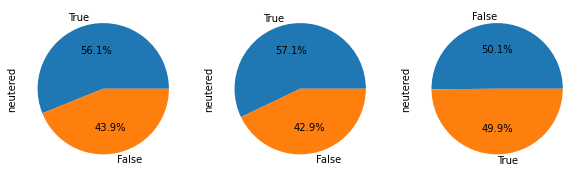

In [ ]:
#훌륭한 구매자를2회이상 그리고 3회이상 2가지 기준으로 나눠서 보았을때 큰 차이를 보지 못한것을보아 중성화 수술은 큰 연관이 없는것 같다.

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
df.neutered.value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,3,2)
good_customer.neutered.value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(1,3,3)
bad_customer.neutered.value_counts().plot.pie(autopct="%1.1f%%")

plt.show()

In [ ]:
#구독자들의 구매력이 2배정도 높다.
subscriber_data[subscriber_data.pet_order_number>5]
print(subscriber_data.pet_order_number.mean())
print(non_subscriber_data.pet_order_number.mean())


18.747238742565845
9.638334145153435


In [ ]:
#건식과 습식 구매비율
print(subscriber_data.dry_food_order_number.sum())
print(subscriber_data.wet_food_order_number.sum())
print(subscriber_data.wet_food_order_number.sum()/subscriber_data.dry_food_order_number.sum())
print('========================================')

print(non_subscriber_data.dry_food_order_number.sum())
print(non_subscriber_data.wet_food_order_number.sum())
print(non_subscriber_data.wet_food_order_number.sum()/non_subscriber_data.dry_food_order_number.sum())
print('========================================')


print(good_customer_data.dry_food_order_number.sum())
print(good_customer_data.wet_food_order_number.sum())
print(good_customer_data.wet_food_order_number.sum()/good_customer_data.dry_food_order_number.sum())
print('========================================')

print(bad_customer_data.dry_food_order_number.sum())
print(bad_customer_data.wet_food_order_number.sum())
print(bad_customer_data.wet_food_order_number.sum()/bad_customer_data.dry_food_order_number.sum())
print('========================================')





104225.0
28168.0
0.27026145358599185
30466.0
9109.0
0.29898903695923323
127837.0
34543.0
0.2702112846828383
6854.0
2734.0
0.39889115844762185


In [ ]:
#구매수가 적음에도 불구하고 그들이 구독을 신청한 이유는 무엇일까?
good_customer_data
bad_customer_data_subscriber=bad_customer_data[bad_customer_data.pet_has_active_subscription==True]
bad_customer_data_subscriber

,pet_order_number,dry_food_order_number,wet_food_order_number,pet_has_active_subscription
customer_id,,,,
1969421412923625,3,0.0,3.0,True
2441192939363434,3,0.0,3.0,True
5748999654342296,3,0.0,3.0,True
16092329011533259,6,6.0,0.0,True
27915514505247136,6,6.0,0.0,True
...,...,...,...,...
18428782358043871704,1,0.0,1.0,True
18433950443498308351,1,1.0,0.0,True
18436248243500688429,1,0.0,1.0,True


- 음식점격언중에 그런말이있다. 한번 실망하면 망설이고 두번실망하면 발을 끊는다. 결국 사료(음식)를 파는 집도 마찬가지일것이다. 기존에 3번이상 시켰다면 그이후에도 구매 의사가 어느 정도있는것으로 판단했다. 

- 3회이상의 구매자들은 2회 이하의 구매자들보다 premium티어의 상품을 구매하는경우가 많다. 지속적인 구매자들을 확보하기위해 premium티어의 상품을 늘리는것도 좋은 방법일것이다.

- 오히려 구독자들이 구매력이 높았다. (구독자들은 따로 상품을 받기에 구매력이 낮을것 같다는 예상을 했지만 그렇지 않았다.) 구독자를 유입시키기 위한 이벤트가 시행된다면 좋을것 같다.

- 2회이하의 구매자들의 습식사료 구매비율이 다른 집단의 습식사료 구매비율보다 높았다. 이는 습식사료의 만족도가 낮지 않은지 의심하게 한다. 이를 해결하기위해 상품별 만족도를 조사해보는것도 좋을것이다.

- 대부분 구매자들이 치킨 사료의 선호율이 높았으나 3회이상 구매자들의 치킨 선호비율이 특히나 높았던것을 보면 치킨이 지속적인 구매를 유도한느 제품중 하나라는것을 알수있을것같다.

- 건식 사료의 경우 애완동물들의 주된식사이고 저장기간이 긴반면 습식 사료의 경우 애완동물의 특별식? 정도로 생각하면 될것같다. 그런데 판매를 보면 건식이 압도적으로 높으나 판매 사료의 티어를 보면 superpremium상품이 압도적으로 판매량이 많다. 어떻게 된건지 조금더 살펴봐야 할것 같다.

- 지속성과는 상관없지만 구매자들의 상당부분이 친구의 추천으로인해 가입한것으로 보아 친구 추천 관련된 홍보물을 만들면 신규 사용자들을 늘릴수 있을것이다. 

